# HR Employee Attrition – Modelo Probabilístico (Naive Bayes)

## Introducción
La rotación de personal (*attrition*) continúa siendo un desafío clave para las organizaciones, ya que genera costos de reemplazo, pérdida de conocimiento y menor productividad.  
Este proyecto busca **evaluar un enfoque probabilístico de clasificación** para estimar la probabilidad de renuncia, utilizando el algoritmo **Naive Bayes**.  

Se enmarca como continuación del proyecto anterior **“HR_Employee_Attrition_Models”**, en el cual se desarrollaron modelos basados en árboles de decisión, bosques aleatorios y regresión logística. Aquí se busca **comparar el rendimiento y las limitaciones de Naive Bayes** frente a esos métodos, bajo las mismas condiciones de datos y preparación.

**Dataset:** `data/HR-Employee-Attrition.csv`  
(IBM HR Analytics – datos sintéticos para uso educativo, ~1.470 filas y ~35 columnas con variables demográficas, de satisfacción, desempeño y antigüedad).

## Preguntas guía
- ¿Cómo se comporta un modelo probabilístico como **Naive Bayes** frente a los modelos anteriores (Decision Tree, Random Forest y Logistic Regression)?  
- ¿Qué supuestos de independencia entre variables afectan su rendimiento?  
- ¿Puede un modelo simple, basado en probabilidad condicional, ofrecer resultados competitivos?

## Objetivos
**Analíticos (EDA):**
- Revisar brevemente la distribución de variables y su relación con la clase `Attrition`.
- Evaluar posibles dependencias entre predictores que influyan en el supuesto de independencia.

**Modelado (ML):**
- Entrenar y evaluar variantes del modelo **Naive Bayes** (`GaussianNB`, `MultinomialNB`, `BernoulliNB`).
- Comparar su desempeño con los modelos del proyecto base.
- Evaluar con **ROC-AUC**, **Recall**, **F1-score** y **Matriz de confusión**.

**Interpretabilidad:**
- Analizar cómo el modelo estima las probabilidades de renuncia según las características de los empleados.

## Alcance y supuestos
- Datos sintéticos, orientados a práctica educativa y portfolio profesional.  
- Se mantienen los mismos procesos de limpieza y transformación del proyecto previo para garantizar comparabilidad.  
- No se incluyen datos reales ni información sensible.

## Reproducibilidad
- Requisitos en `requirements.txt`.  
- Dataset público incluido en `data/HR-Employee-Attrition.csv`.  
- Semillas aleatorias fijadas para garantizar replicabilidad.

---

**Estructura del notebook:**  

0) Configuración inicial  
1) Carga e inspección de datos  
2) Preparación y transformación de variables  
3) EDA (versión abreviada, centrada en independencia y distribución por clase)  
4) Modelado con Naive Bayes  
5) Evaluación y conclusiones

# 0. Configuración inicial

En esta sección se importan las librerías necesarias y se definen configuraciones visuales globales  
que se aplicarán a lo largo del notebook.

In [2]:
# --- Importaciones principales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocesamiento y división ---
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# --- Modelo probabilístico ---
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# --- Evaluación ---
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

In [ ]:
# --- Configuración visual ---

# Estilo general de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Mostrar todas las columnas al inspeccionar DataFrames
pd.set_option('display.max_columns', None)

# 1. Carga e inspección inicial de los datos
En esta sección se importa el dataset y se realiza una primera exploración general.  
El objetivo es verificar la estructura, tipos de datos, valores nulos o duplicados,  
y obtener una visión preliminar del contenido antes del análisis detallado.

In [4]:
# --- Carga de datos ---
df = pd.read_csv("data/HR_Employee_Attrition.csv")

In [5]:
# --- Vista general y estructura ---
print("Dimensiones:", df.shape)
display(df.head())
print("\nInformación general del DataFrame:\n")
df.info()

Dimensiones: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2



Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null  

In [6]:
# --- Calidad de datos ---

# Valores nulos por columna
nulos = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:\n")
print(nulos.to_string())

# Filas duplicadas
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

Valores nulos por columna:

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel    

In [7]:
# --- Estadísticas generales ---

# Resumen estadístico de las variables numéricas
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [8]:
# --- Variable objetivo y cardinalidad ---

# Distribución de la variable objetivo
print("Distribución de 'Attrition':\n")
print(df['Attrition'].value_counts())
print("\nProporción (%):")
print(round(df['Attrition'].value_counts(normalize=True) * 100, 2))

# Cardinalidad de las variables
print("\nCantidad de valores únicos por columna:\n")
print(df.nunique().sort_values(ascending=False))

Distribución de 'Attrition':

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Proporción (%):
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

Cantidad de valores únicos por columna:

EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction

## Eliminación de variables sin valor explicativo

Antes del análisis exploratorio y posterior modelado, se eliminan las variables que no aportan información relevante para predecir la variable objetivo `Attrition`.  
A partir del análisis de la cantidad de valores únicos por columna, se observa que algunas variables son constantes o identificadoras, por lo que carecen de valor predictivo.

Las variables eliminadas son:

- **EmployeeNumber:** identificador único de cada empleado (sin relación con la rotación).  
- **EmployeeCount:** solo un valor único en toda la columna.  
- **StandardHours:** constante para todos los registros.  
- **Over18:** también constante, dado que todos los empleados son mayores de edad.  

Estas variables no tienen potencial explicativo y se eliminan del dataset antes del modelado.

In [9]:
# --- Eliminación de variables sin valor explicativo ---

cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

# Verificación rápida tras la eliminación
print("Dimensiones después de eliminar columnas:", df.shape)

Dimensiones después de eliminar columnas: (1470, 31)


# 2. Preparación y transformación de variables
En esta sección se realiza el preprocesamiento inicial del dataset.  
Se revisa la variable objetivo **Attrition** y se la convierte a formato numérico (1 = Yes, 0 = No),  
dejando el conjunto de datos listo para el análisis exploratorio y el modelado posterior.

## Transformación de variables dicotómicas

En esta etapa se convierten las variables categóricas binarias (con valores `Yes/No` o `Male/Female`) 
a formato numérico (`1/0`), requisito necesario para los algoritmos de *Machine Learning*.  
La variable objetivo **Attrition** (renuncia del empleado) y las variables **OverTime** y **Gender**
se transforman en valores binarios equivalentes.

In [10]:
# --- Verificación de la variable objetivo ---
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
# --- Transformación de variables dicotómicas ---
# Se convierten las variables categóricas binarias (Yes/No) a formato numérico (1/0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [13]:
# --- Verificación del cambio ---

print("Attrition:")
print(df['Attrition'].value_counts(), "\n")

print("OverTime:")
print(df['OverTime'].value_counts(), "\n")

print("Gender:")
print(df['Gender'].value_counts())

Attrition:
Attrition
0    1233
1     237
Name: count, dtype: int64 

OverTime:
OverTime
0    1054
1     416
Name: count, dtype: int64 

Gender:
Gender
1    882
0    588
Name: count, dtype: int64


## Análisis del balance de clases

Antes del modelado, es importante observar la proporción de empleados que renunciaron (`Attrition = 1`)  
respecto de los que permanecen en la empresa (`Attrition = 0`). Esto permite anticipar posibles sesgos del modelo.

C:\Users\elias\AppData\Local\Temp\ipykernel_12516\2060941741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


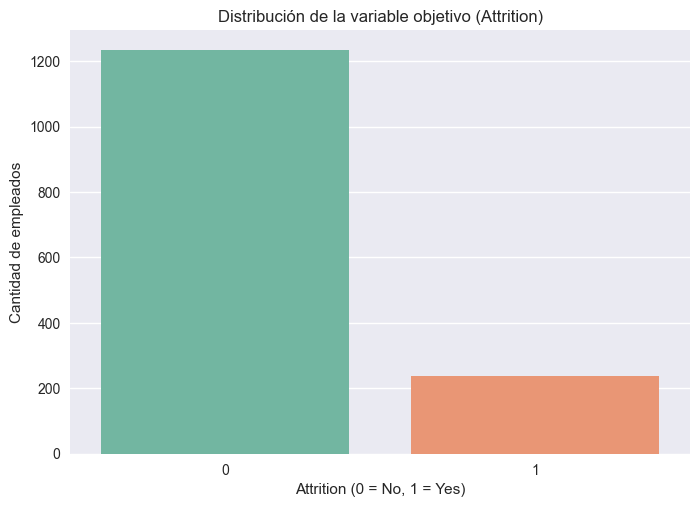


Porcentaje de cada clase:
Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [14]:
# --- Análisis del balance de clases ---
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Distribución de la variable objetivo (Attrition)')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Cantidad de empleados')
plt.show()

# Porcentaje de cada clase
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"\nPorcentaje de cada clase:\n{attrition_rate.round(2)}")

## Identificación de variables numéricas y categóricas

Antes de avanzar con el análisis exploratorio, se identifican las variables numéricas y categóricas del dataset.  
Esto permitirá decidir qué tipo de visualizaciones y transformaciones aplicar en cada caso.

In [15]:
# --- Identificación de variables numéricas y categóricas ---

# Seleccionamos los nombres de las columnas según su tipo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", len(num_cols))
print(num_cols.tolist())
print("\nVariables categóricas:", len(cat_cols))
print(cat_cols.tolist())

Variables numéricas: 26
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas: 5
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


## Codificación de variables categóricas (One-Hot Encoding)

Algunas variables categóricas contienen más de dos categorías (por ejemplo, 
`BusinessTravel`, `Department`, `JobRole`, `MaritalStatus` o `EducationField`).  
Para que puedan ser utilizadas por los algoritmos de *Machine Learning*, se transforman 
mediante **One-Hot Encoding**, que crea una nueva columna por cada categoría posible, 
con valores binarios (`0` o `1`).  

Este paso convierte todas las variables categóricas en formato numérico, 
manteniendo la información original sin introducir un orden artificial entre las categorías.

In [16]:
# --- Selección de variables categóricas a codificar ---
X_cat = df[['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus']]

In [17]:
# --- Inicialización y transformación ---
ohe = OneHotEncoder()
X_cat_encoded = ohe.fit_transform(X_cat).toarray()

In [18]:
# --- Conversión a DataFrame con nombres de columnas legibles ---
X_cat_encoded = pd.DataFrame(
    X_cat_encoded, 
    columns=ohe.get_feature_names_out(X_cat.columns)
)

In [19]:
# Se conserva el mismo índice del DataFrame original
# para mantener alineadas las filas al concatenar.
X_cat_encoded.index = df.index

In [20]:
# --- Unión con el DataFrame original y eliminación de las columnas originales ---
df_encoded = pd.concat([df.drop(X_cat.columns, axis=1), X_cat_encoded], axis=1)

In [21]:
# ohe.get_feature_names_out(X_cat.columns)  # Útil para inspeccionar las columnas creadas

In [22]:
# --- Verificación final ---
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

# 3. Análisis exploratorio de los datos (EDA)

En esta sección se analizan distribuciones, relaciones y patrones entre variables 
(numéricas y categóricas), con especial atención a su vínculo con la variable objetivo 
**Attrition**.

## Correlación de las variables numéricas con Attrition

La correlación de las variables numéricas con la variable objetivo es baja en general,
lo que sugiere que la rotación no depende de un único factor cuantitativo, sino de la
combinación de múltiples variables (numéricas y categóricas). Esto refuerza la necesidad
de considerar interacciones y patrones distribuidos al momento del modelado.

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
Gender                      0.029453
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


C:\Users\elias\AppData\Local\Temp\ipykernel_12516\826133724.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


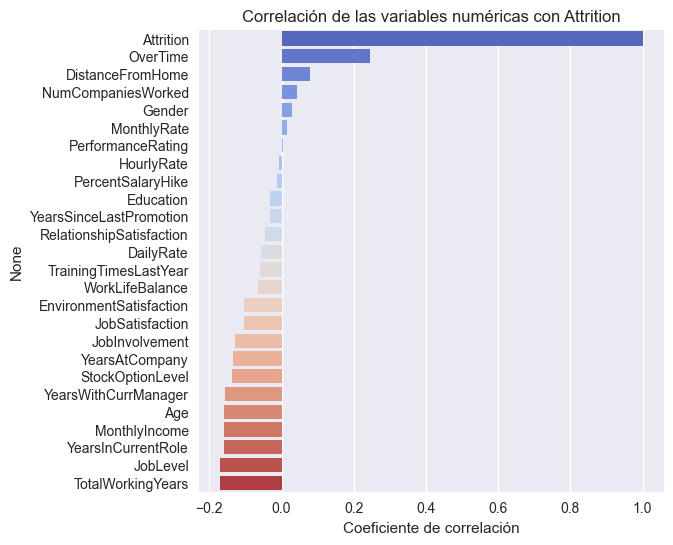

In [23]:
# --- Correlación de variables numéricas con Attrition ---
corr_target = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(corr_target)

# --- Visualización de correlaciones ---
plt.figure(figsize=(6,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Correlación de las variables numéricas con Attrition')
plt.xlabel('Coeficiente de correlación')
plt.show()

Para mejorar la legibilidad, se seleccionaron las variables numéricas con mayor relación
con la variable objetivo en lugar de mostrar la matriz completa de correlaciones. Estas
variables representan distintos aspectos del perfil laboral (edad, ingreso, antigüedad,
promociones, distancia al trabajo) que podrían influir en la rotación del personal.

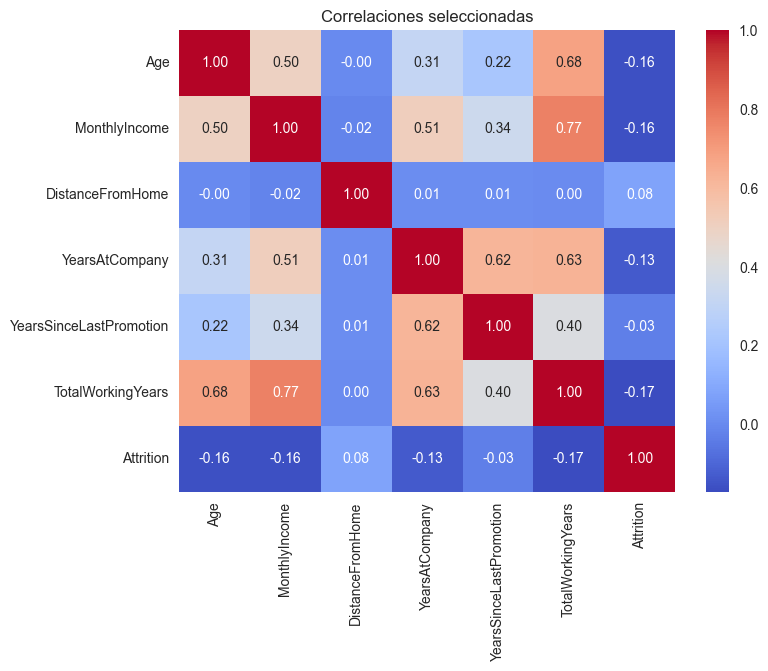

In [24]:
# --- Matriz de correlación de variables numéricas seleccionadas ---

num_focus = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
             'YearsSinceLastPromotion', 'TotalWorkingYears', 'Attrition']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_focus].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones seleccionadas')
plt.show()


## Análisis de variables categóricas
En esta sección se exploran las principales variables categóricas en relación con la variable objetivo **Attrition**, 
para detectar patrones de comportamiento o posibles factores asociados a la rotación del personal.

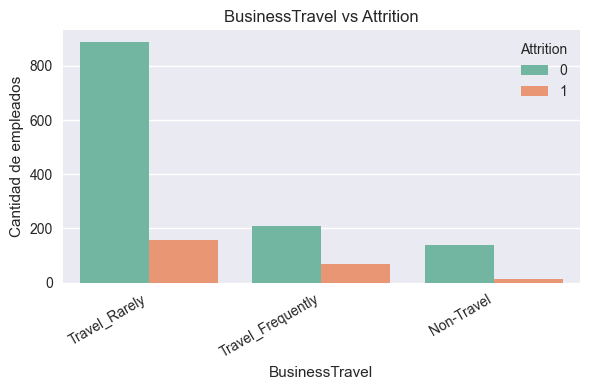

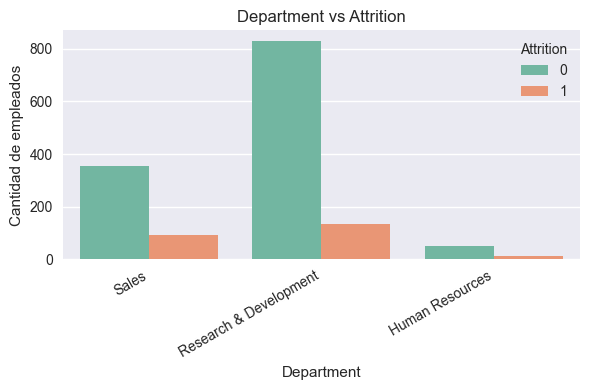

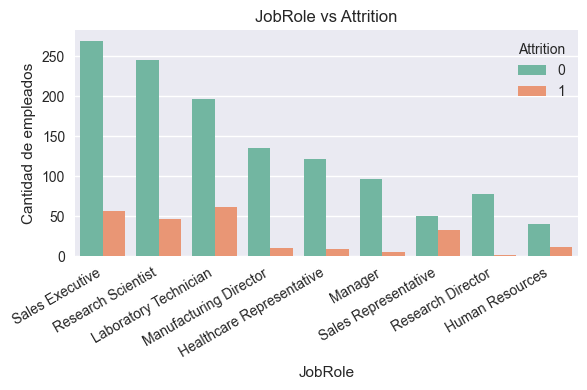

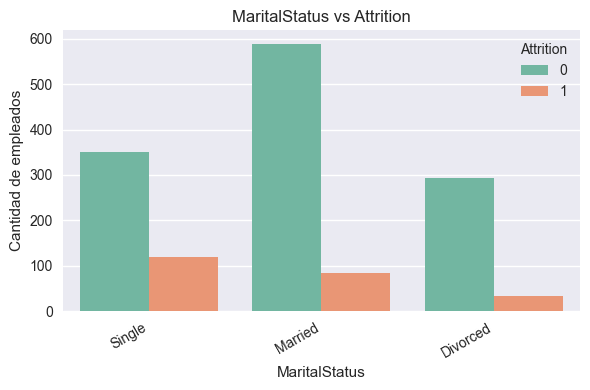

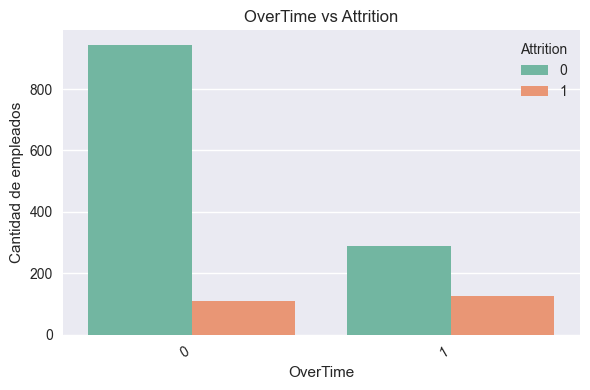

In [25]:
# --- Variables categóricas clave ---
cat_focus = ['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_focus:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Cantidad de empleados')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

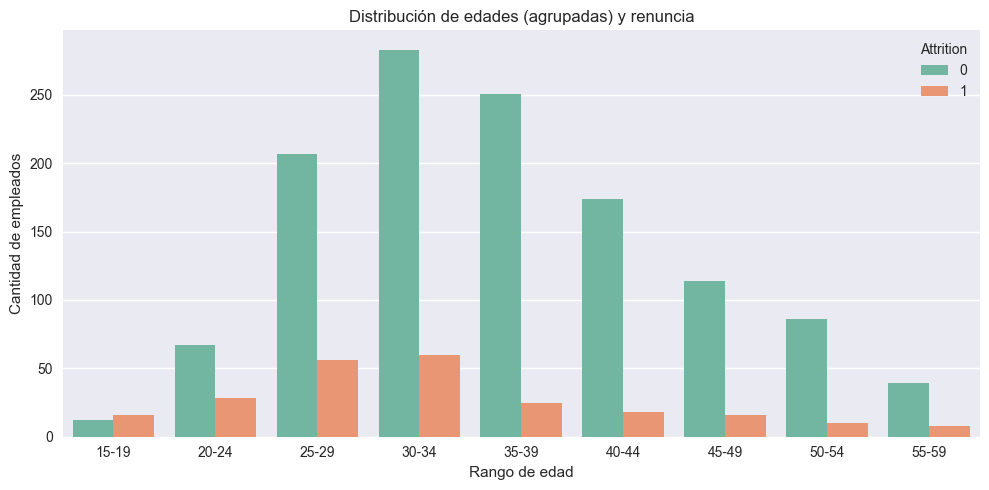

In [26]:
# --- Edad agrupada en rangos de 5 años ---

bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.countplot(x='AgeGroup', hue='Attrition', data=df, palette='Set2')
plt.title('Distribución de edades (agrupadas) y renuncia')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

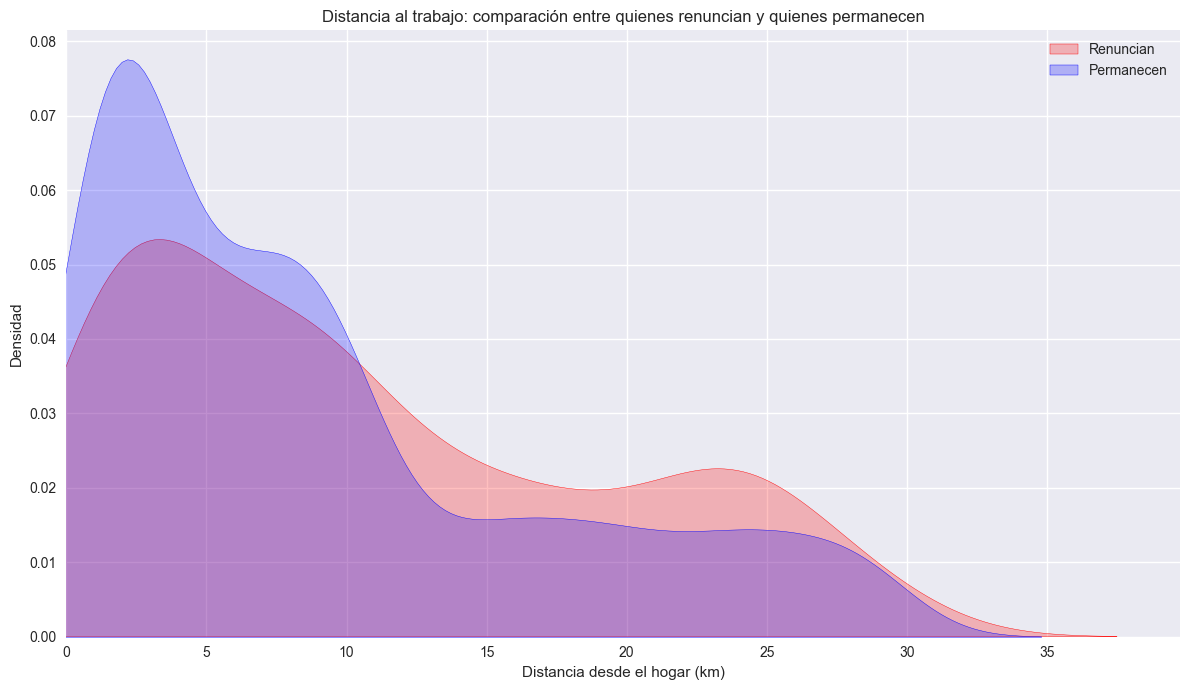

In [27]:
# --- Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen ---

plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition'] == 1]['DistanceFromHome'], label="Renuncian", color='r', fill=True, common_norm=False)
sns.kdeplot(df[df['Attrition'] == 0]['DistanceFromHome'], label="Permanecen", color='b', fill=True, common_norm=False)
plt.title('Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen')
plt.xlabel('Distancia desde el hogar (km)')
plt.ylabel('Densidad')
plt.legend()
plt.xlim(0)
plt.tight_layout()
plt.show()

> Se utiliza `common_norm=False` para normalizar cada curva de forma independiente y comparar la forma de las distribuciones sin efectos derivados del desbalance de clases.

### Interpretación general de las variables

Se observan patrones claros en la relación entre las variables analizadas y la variable objetivo
(**Attrition**), que representa la renuncia del empleado a la empresa:

- Los empleados que realizan **horas extra (`OverTime = Yes`)** presentan una tasa de abandono
significativamente mayor.
- En cuanto a los **roles y departamentos**, se identifica una mayor proporción de salidas en
puestos operativos como *Sales Executive*, *Laboratory Technician* y *Research Scientist*,
lo que sugiere un nivel de rotación superior frente a cargos gerenciales.
- El **estado civil** también muestra diferencias: los empleados **solteros** tienden a dejar la empresa
con mayor frecuencia que los casados o divorciados.
- Respecto a los **viajes laborales (`BusinessTravel`)**, quienes viajan más asiduamente muestran una
tendencia levemente superior a abandonar la organización.
- En las variables numéricas, los empleados **más jóvenes** exhiben mayores tasas de salida, lo cual
podría asociarse a una menor estabilidad laboral o exploración de nuevas oportunidades profesionales.
- La **distancia desde el hogar (`DistanceFromHome`)** presenta una diferencia moderada: quienes viven
más lejos muestran una propensión algo mayor a abandonar, aunque el efecto no es determinante.

Estos resultados indican que la salida de empleados no depende de un único factor cuantitativo, sino de
la **combinación de condiciones laborales y personales**, que en conjunto pueden aumentar la probabilidad
de abandono.

## Síntesis del análisis exploratorio

El análisis exploratorio permitió identificar patrones tanto en variables numéricas como categóricas.  
Las correlaciones mostraron relaciones débiles entre las variables cuantitativas y la renuncia, lo que sugiere que el abandono de la empresa no depende de un único factor medible, sino de la combinación de aspectos laborales y personales.  
En las variables categóricas, destacan las tasas más altas de renuncia entre empleados con horas extra frecuentes,
determinados puestos operativos y personas solteras.  
Estos hallazgos orientan las siguientes etapas de modelado predictivo, donde se evaluará qué variables contribuyen con mayor peso a predecir la probabilidad de renuncia.

# 4. Modelado predictivo

En esta etapa se construyen y evalúan **diferentes variantes del modelo de clasificación Naive Bayes**, con el
objetivo de predecir la probabilidad de renuncia de un empleado a partir de las variables disponibles.

Este enfoque probabilístico permite modelar la relación entre las características del empleado y la variable
objetivo **Attrition**, asumiendo independencia condicional entre las variables predictoras. Si bien esta
suposición rara vez se cumple de manera estricta en contextos reales, el algoritmo suele ofrecer resultados
competitivos y una interpretación clara de las probabilidades asociadas a cada clase.

Antes del entrenamiento, se definen las variables predictoras (**X**) y la variable objetivo (**y**), y se
realiza la **división del conjunto de datos** en entrenamiento y prueba, manteniendo la proporción de clases
observada en el dataset original (*stratify*). Esto permite evaluar el desempeño del modelo de manera
consistente y mitigar posibles sesgos derivados del desbalance de clases.

In [28]:
# --- Definición de variables predictoras y variable objetivo ---
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [29]:
# --- División en conjunto de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [30]:
print(f"Tamaño de entrenamiento: {len(X_train)}")
print(f"Tamaño de prueba: {len(X_test)}")

Tamaño de entrenamiento: 1029
Tamaño de prueba: 441


## 4.1 Naive Bayes Gaussiano (GaussianNB)

Esta variante asume que las características siguen una **distribución normal (gaussiana)** dentro de cada clase.
Es especialmente adecuada cuando existen variables **numéricas continuas**, como edad, ingresos, tiempo en la
empresa o distancia al trabajo, presentes en este dataset. 

Debido a esta compatibilidad con variables continuas, GaussianNB suele ofrecer un rendimiento estable en
contextos mixtos donde conviven atributos numéricos y categóricos codificados mediante One-Hot Encoding.

In [31]:
# --- Modelo Naive Bayes Gaussiano ---
# Esta variante se utiliza como base para comparar el rendimiento de diferentes versiones de Naive Bayes.

model_nb_gaussian = GaussianNB()
model_nb_gaussian.fit(X_train, y_train)

GaussianNB()

In [32]:
# --- Predicciones ---
# Se generan las predicciones sobre el conjunto de prueba (X_test) utilizando el modelo base.
y_pred_nb = model_nb_gaussian.predict(X_test)

=== Modelo Naive Bayes (base) ===
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       370
           1       0.32      0.63      0.43        71

    accuracy                           0.73       441
   macro avg       0.62      0.69      0.62       441
weighted avg       0.82      0.73      0.76       441



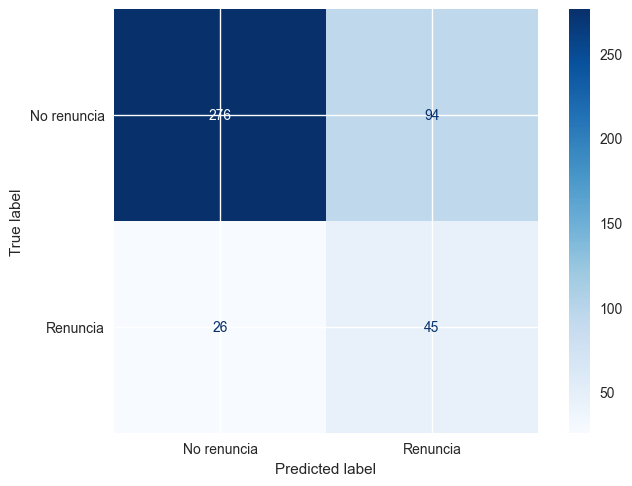

In [33]:
# --- Evaluación del modelo Naive Bayes ---

print("=== Modelo Naive Bayes (base) ===")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb, display_labels=['No renuncia', 'Renuncia']).plot(cmap='Blues')

In [34]:
# --- Probabilidades de predicción ---
y_proba_nb = model_nb_gaussian.predict_proba(X_test)[:, 1]

In [35]:
# --- ROC-AUC ---
auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f"ROC-AUC (Naive Bayes): {auc_nb:.3f}")

ROC-AUC (Naive Bayes): 0.744


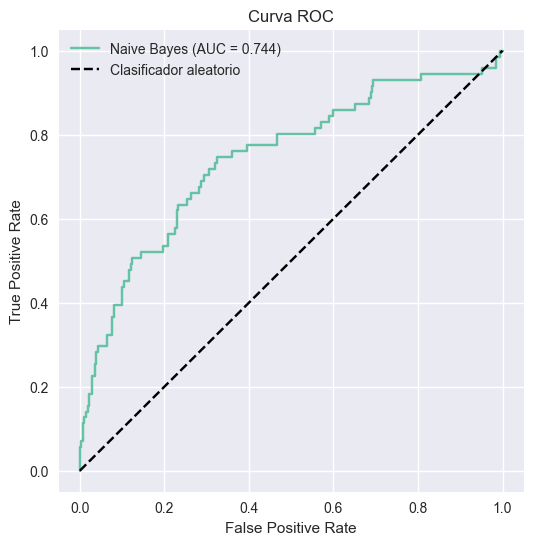

In [36]:
# --- Curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

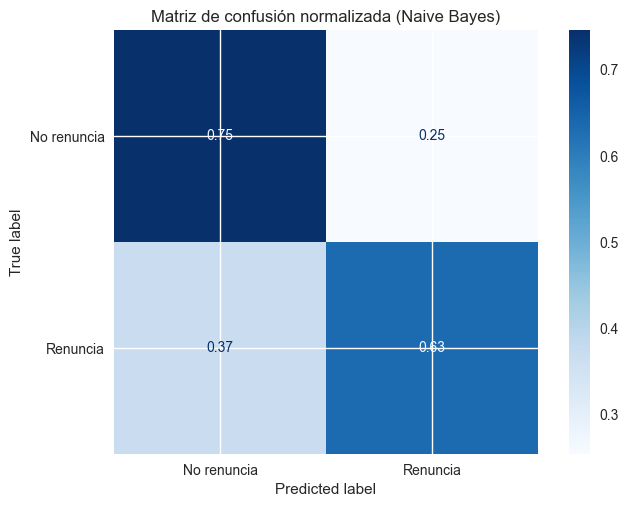

In [ ]:
# --- Matriz de confusión normalizada ---
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb, normalize='true',
    display_labels=['No renuncia', 'Renuncia'],
    cmap='Blues'
)
plt.title('Matriz de confusión normalizada (Naive Bayes)')
plt.show()

### 📊 Interpretación del modelo Naive Bayes Gaussiano (GaussianNB)

El modelo **Gaussian Naive Bayes** obtiene un rendimiento global aceptable, con una **accuracy del 73 %** y un
**ROC–AUC de 0.74**, lo que indica una capacidad moderada para distinguir entre empleados que renuncian y quienes
permanecen. Este valor de AUC se sitúa por encima del obtenido por la variante Bernoulli, reflejando un mejor
aprovechamiento de las variables numéricas continuas presentes en el dataset.

Al analizar el desempeño por clase, se observa un comportamiento desigual:

- Para la clase **0 (No renuncia)**, el modelo alcanza una *precision* muy alta (0.91), pero un *recall* menor
  (0.75), lo que indica que identifica correctamente a quienes permanecen, aunque tiende a confundir algunos
  casos como renuncias.
- Para la clase **1 (Renuncia)**, se observa la situación inversa: *precision* baja (0.32) pero *recall* moderado
  (0.63). Es decir, cuando el modelo predice que alguien renuncia, suele equivocarse con frecuencia, pero logra
  detectar una proporción razonable de abandonos reales.

Este comportamiento sugiere un **sesgo hacia la clase minoritaria** en términos de detección, lo que reduce la
cantidad de falsos negativos (empleados que renuncian pero son clasificados como permanentes), aunque incrementa
la aparición de falsos positivos.

En el contexto de gestión de talento, este tipo de error puede tener **valor preventivo**, ya que habilita la
posibilidad de intervención temprana, aun a costa de alarmas falsas. Sin embargo, una alta tasa de falsos
positivos puede generar esfuerzos adicionales en seguimiento.

Finalmente, debido a la **suposición de independencia condicional** entre variables, es esperable que algunas
relaciones presentes en los datos no sean capturadas completamente. No obstante, el algoritmo ofrece
**entrenamiento rápido**, buena interpretabilidad probabilística, y un rendimiento competitivo como punto de
partida para comparar variantes más especializadas.

## 4.2 Naive Bayes Bernoulli (BernoulliNB)

Esta variante está diseñada para características **binarias (0/1)**, donde se modela la presencia o ausencia de
un atributo. Resulta especialmente adecuada cuando se utilizan variables categóricas codificadas mediante
*One-Hot Encoding*, como ocurre en este dataset. 

BernoulliNB tiende a desempeñarse mejor cuando las distribuciones de valores se concentran en dos estados
posibles, lo que permite capturar patrones simples asociados a la renuncia. No obstante, su rendimiento puede
verse limitado al no aprovechar la variabilidad de características numéricas continuas, como edad o ingresos.

In [38]:
# --- Modelo Naive Bayes Bernoulli ---
# Esta variante está optimizada para características binarias (0/1), como las generadas por One-Hot Encoding.

model_nb_bernoulli = BernoulliNB()
model_nb_bernoulli.fit(X_train, y_train)

BernoulliNB()

In [40]:
# --- Predicciones ---
# Se generan las predicciones sobre el conjunto de prueba (X_test).
y_pred_nb_bernoulli = model_nb_bernoulli.predict(X_test)

=== Modelo Naive Bayes Bernoulli ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       370
           1       0.42      0.32      0.37        71

    accuracy                           0.82       441
   macro avg       0.65      0.62      0.63       441
weighted avg       0.80      0.82      0.81       441



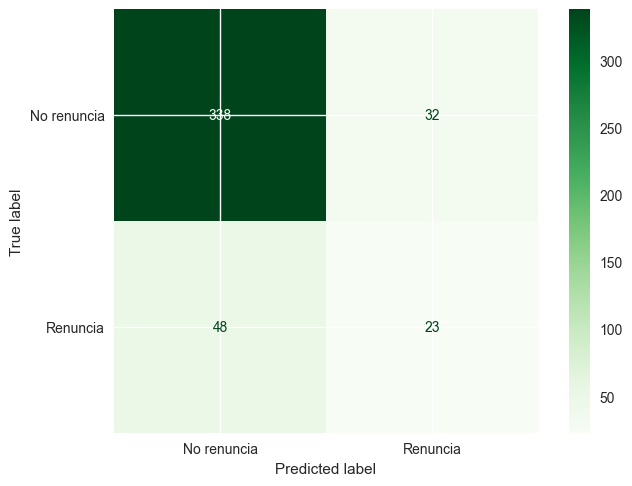

In [41]:
# --- Evaluación del modelo Naive Bayes Bernoulli ---

print("=== Modelo Naive Bayes Bernoulli ===")
print(classification_report(y_test, y_pred_nb_bernoulli))

cm_nb_bernoulli = confusion_matrix(y_test, y_pred_nb_bernoulli)
ConfusionMatrixDisplay(cm_nb_bernoulli, display_labels=['No renuncia', 'Renuncia']).plot(cmap='Greens')

In [42]:
# --- Probabilidades de predicción ---
y_proba_nb_bernoulli = model_nb_bernoulli.predict_proba(X_test)[:, 1]

In [43]:
# --- ROC-AUC ---
auc_nb_bernoulli = roc_auc_score(y_test, y_proba_nb_bernoulli)
print(f"ROC-AUC (BernoulliNB): {auc_nb_bernoulli:.3f}")

ROC-AUC (BernoulliNB): 0.719


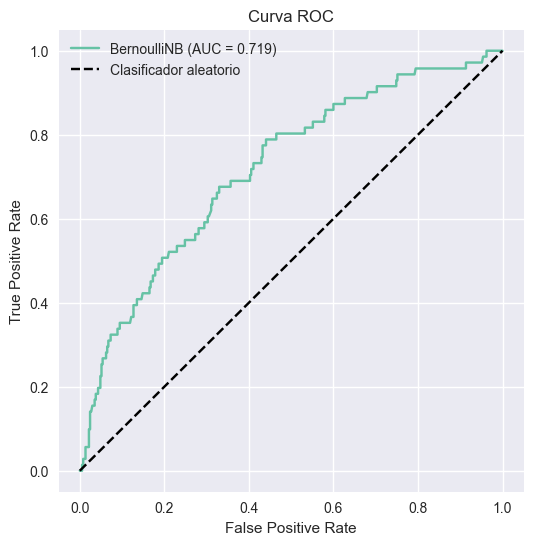

In [44]:
# --- Curva ROC ---
fpr_b, tpr_b, thresholds_b = roc_curve(y_test, y_proba_nb_bernoulli)

plt.figure(figsize=(6, 6))
plt.plot(fpr_b, tpr_b, label=f"BernoulliNB (AUC = {auc_nb_bernoulli:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

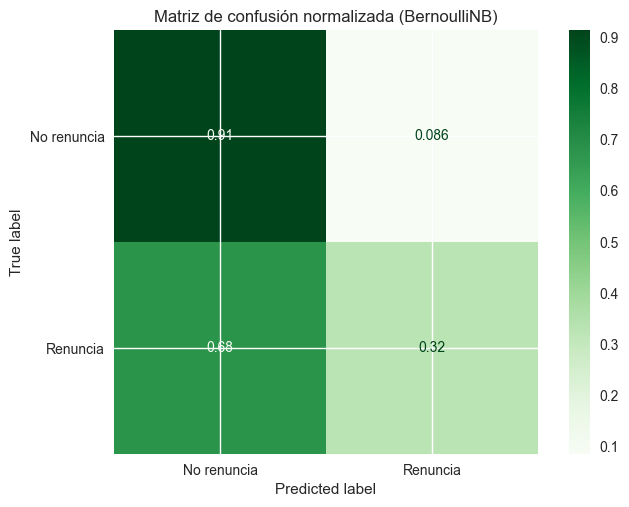

In [45]:
    # --- Matriz de confusión normalizada ---
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb_bernoulli, normalize='true',
    display_labels=['No renuncia', 'Renuncia'],
    cmap='Greens'
)
plt.title('Matriz de confusión normalizada (BernoulliNB)')
plt.show()

### 📊 Interpretación del modelo Naive Bayes Bernoulli (BernoulliNB)

El modelo **Bernoulli Naive Bayes** alcanza un rendimiento general aceptable, con una **accuracy del 82 %** y
un **ROC–AUC de 0.72**, lo que indica una capacidad moderada para distinguir entre empleados que renuncian y
quienes permanecen. Estos valores se sitúan levemente por debajo del desempeño observado en la variante
Gaussiana.

En la evaluación por clase, se observa un comportamiento **asimétrico**:

- Para la clase **0 (No renuncia)**, el modelo obtiene valores elevados de *precision* (0.88) y *recall*
  (0.91), identificando correctamente a la mayoría de los empleados que permanecen en la empresa.
- En la clase **1 (Renuncia)**, las métricas son sensiblemente menores (*precision* = 0.42, *recall* = 0.32),
  reflejando la dificultad para detectar casos de abandono en un **dataset desbalanceado**.

El modelo tiende a **clasificar por defecto hacia la clase mayoritaria**, lo que incrementa la cantidad de
**falsos negativos** (empleados que renuncian pero son predichos como retenidos). Este tipo de error es
particularmente relevante en contextos de gestión de talento, ya que puede impedir la aplicación temprana de
medidas preventivas.

Este comportamiento es esperable, dado que BernoulliNB está optimizado para características **binarias
(0/1)** y no aprovecha completamente la variabilidad de atributos numéricos continuos. No obstante, ofrece
**entrenamiento rápido**, interpretabilidad y constituye una opción válida para evaluar el impacto de la
binarización en el rendimiento predictivo.

## 4.3 Naive Bayes Multinomial (MultinomialNB)

Esta variante se utiliza típicamente en problemas donde las características representan **conteos discretos**,
como la frecuencia de palabras en análisis de texto (*bag-of-words*). En este dataset, no existe información estructurada como conteos, por lo que su aplicación se incluye con fines comparativos.

Si bien MultinomialNB puede operar sobre valores no binarios, su desempeño puede verse afectado cuando las características no provienen de distribuciones basadas en frecuencias, lo que lo convierte en un enfoque menos natural para este tipo de datos.

Por este motivo, se evalúa la variante Multinomial principalmente con fines exploratorios y comparativos, permitiendo observar cómo varía el rendimiento frente a estructuras de datos no ideales.

In [46]:
# --- Modelo Naive Bayes Multinomial ---
model_nb_multinomial = MultinomialNB()
model_nb_multinomial.fit(X_train, y_train)

MultinomialNB()

In [47]:
# --- Predicciones ---
# Se generan las predicciones sobre el conjunto de prueba (X_test).
y_pred_nb_multinomial = model_nb_multinomial.predict(X_test)

=== Modelo Naive Bayes Multinomial ===
              precision    recall  f1-score   support

           0       0.87      0.49      0.62       370
           1       0.18      0.61      0.28        71

    accuracy                           0.51       441
   macro avg       0.52      0.55      0.45       441
weighted avg       0.76      0.51      0.57       441



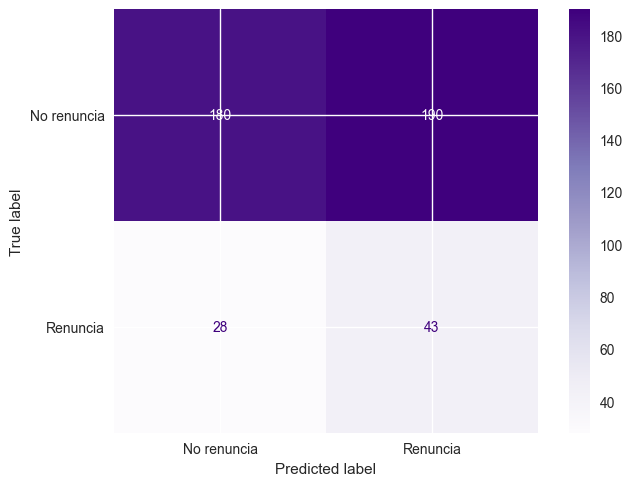

In [48]:
# --- Evaluación del modelo Naive Bayes Multinomial ---

print("=== Modelo Naive Bayes Multinomial ===")
print(classification_report(y_test, y_pred_nb_multinomial))

cm_nb_multinomial = confusion_matrix(y_test, y_pred_nb_multinomial)
ConfusionMatrixDisplay(cm_nb_multinomial,
                       display_labels=['No renuncia', 'Renuncia']).plot(cmap='Purples')

In [49]:
# --- Probabilidades de predicción ---
y_proba_nb_multinomial = model_nb_multinomial.predict_proba(X_test)[:, 1]

In [50]:
# --- ROC-AUC ---
auc_nb_multinomial = roc_auc_score(y_test, y_proba_nb_multinomial)
print(f"ROC-AUC (MultinomialNB): {auc_nb_multinomial:.3f}")

ROC-AUC (MultinomialNB): 0.568


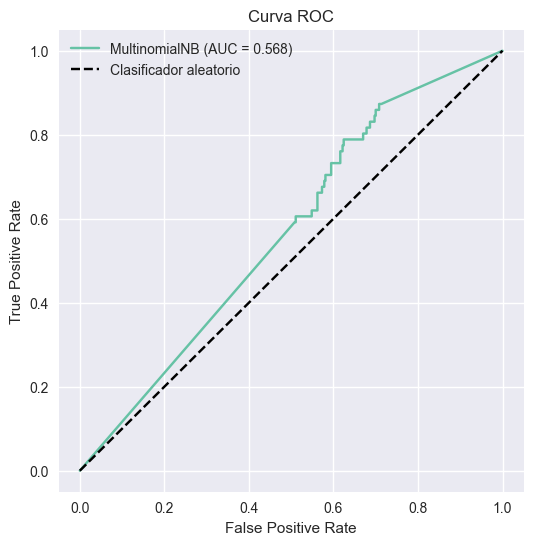

In [51]:
# --- Curva ROC ---
fpr_m, tpr_m, thresholds_m = roc_curve(y_test, y_proba_nb_multinomial)

plt.figure(figsize=(6, 6))
plt.plot(fpr_m, tpr_m, label=f"MultinomialNB (AUC = {auc_nb_multinomial:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

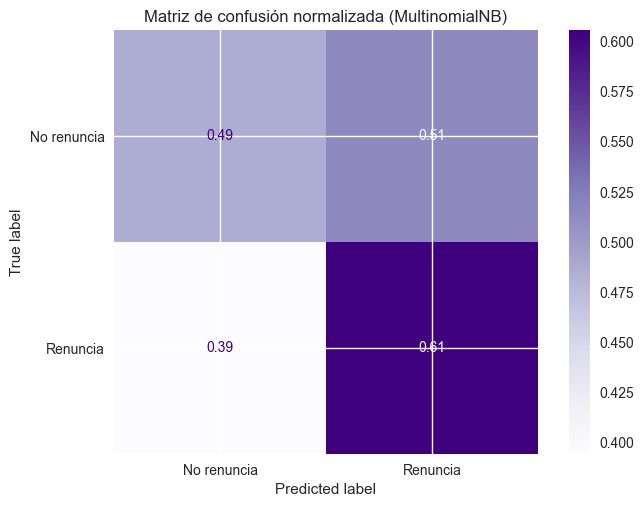

In [52]:
# --- Matriz de confusión normalizada ---
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb_multinomial, normalize='true',
    display_labels=['No renuncia', 'Renuncia'],
    cmap='Purples'
)
plt.title('Matriz de confusión normalizada (MultinomialNB)')
plt.show()

### 📊 Interpretación del modelo Naive Bayes Multinomial (MultinomialNB)

El modelo **Multinomial Naive Bayes** presenta un rendimiento considerablemente inferior respecto a las otras variantes evaluadas, con una **accuracy del ~51 %** y un **ROC–AUC de ~0.56**, valores cercanos al desempeño de un clasificador aleatorio.

**Desempeño por clase**
- **Clase 0 (No renuncia):** *precision* = 0.87, *recall* = 0.49 → identifica solo la mitad de quienes permanecen.
- **Clase 1 (Renuncia):** *precision* = 0.18, *recall* = 0.61 → detecta varias renuncias pero con muchos **falsos positivos**.

Este patrón sugiere que el modelo intenta compensar el **desbalance de clases** aumentando la detección de renuncias, pero **compromete severamente la precisión**.

El bajo desempeño se explica porque **MultinomialNB** está diseñado para características basadas en **conteos discretos** (p. ej., frecuencia de palabras), estructura ausente en este dataset. En estas condiciones, la estimación probabilística se vuelve inestable.

**Síntesis:** útil como referencia comparativa, pero **no apropiado** para este tipo de variables en comparación con **GaussianNB** y **BernoulliNB**.

# 5. Conclusiones generales

La comparación entre las variantes de **Naive Bayes** permitió evaluar cómo diferentes supuestos estadísticos
impactan en la predicción de la renuncia de empleados (*Attrition*) en un contexto con **desbalance de clases**.

## Comparativa de modelos (Naive Bayes)

| Modelo                  | Accuracy | Precision Clase 1 | Recall Clase 1 | F1 Clase 1 | ROC–AUC |
|------------------------|----------|-------------------|----------------|------------|---------|
| GaussianNB             | 0.73     | 0.32              | 0.63           | 0.43       | 0.74    |
| BernoulliNB            | 0.82     | 0.42              | 0.32           | 0.37       | 0.72    |
| MultinomialNB          | 0.51     | 0.18              | 0.61           | 0.28       | 0.56    |

En términos comparativos, **GaussianNB** se posiciona como la variante más adecuada para este dataset, al lograr
el mejor equilibrio entre sensibilidad y capacidad discriminativa (ROC–AUC). **BernoulliNB** se mantiene
competitivo, aunque penalizado por la pérdida de información al trabajar con atributos binarizados.
**MultinomialNB**, por su parte, muestra un desempeño marcadamente inferior, confirmando que su estructura es
menos apropiada cuando las características no representan conteos discretos.

En conjunto, los resultados reflejan que la elección del modelo debe considerar la **naturaleza de las
variables** y que el desbalance continúa siendo un desafío central. No obstante, el experimento demuestra la
utilidad de Naive Bayes como aproximación inicial: es rápido, interpretable y permite comparar comportamientos
bajo diferentes supuestos probabilísticos.

# 6. Implicancias operativas (perspectiva de RRHH)

Los modelos evaluados permiten identificar perfiles con mayor propensión a la renuncia, lo que abre la
posibilidad de implementar acciones preventivas orientadas a la retención del talento. En términos operativos,
las áreas de Recursos Humanos podrían:

- Priorizar **entrevistas de seguimiento** con empleados identificados como de riesgo para anticipar causas
  de abandono.
- Fortalecer la **gestión de carga laboral** en roles donde el sobretiempo es recurrente.
- Revisar **políticas de movilidad interna** para empleados con trayectorias recientes o baja antigüedad
  percibida.
- Ofrecer planes de **desarrollo profesional** a segmentos jóvenes, más propensos a explorar oportunidades externas.
- Analizar **distancia al trabajo** y explorar esquemas híbridos o flexibles, cuando sea pertinente.

Si bien los modelos presentan limitaciones en la detección de renuncias debido al desbalance de clases, su uso
complementario con métricas de clima laboral y encuestas internas puede aportar información valiosa para la
toma de decisiones. En conjunto, este enfoque contribuye a una **gestión estratégica del talento**, disminuye
costos asociados al reemplazo de personal y mejora la experiencia corporativa del empleado.

# 7. Mejoras futuras

A partir de los resultados obtenidos, se identifican algunas líneas que podrían explorarse en etapas posteriores de aprendizaje:

- Evaluar variantes adicionales de Naive Bayes (como ComplementNB) para comparar supuestos probabilísticos.
- Probar técnicas de oversampling (como SMOTE) y analizar su impacto sobre la clase minoritaria.
- Experimentar con el ajuste del umbral de decisión en función de costos asociados a falsos negativos.
- Investigar el ajuste del parámetro de suavizado (α) mediante métodos de búsqueda de hiperparámetros.
- Analizar la interpretabilidad probabilística para comprender con mayor detalle qué características elevan el riesgo de renuncia.
- Simular actualizaciones periódicas del modelo para observar cambios en patrones de comportamiento.

Estas posibles mejoras permitirían profundizar en el uso de modelos probabilísticos y acercar el análisis a contextos organizacionales reales, a medida que incorporo nuevos conceptos.